In [1]:
import numpy as np
import pandas as pd
import  scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [2]:
df=pd.read_csv('concrete_data.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
# applying regression without any transformation
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.6275531792314852

In [10]:
# cross check with cross avla score
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))
# 10 times mean of the accurcy by changing the train test dataset

np.float64(0.4609940491662864)

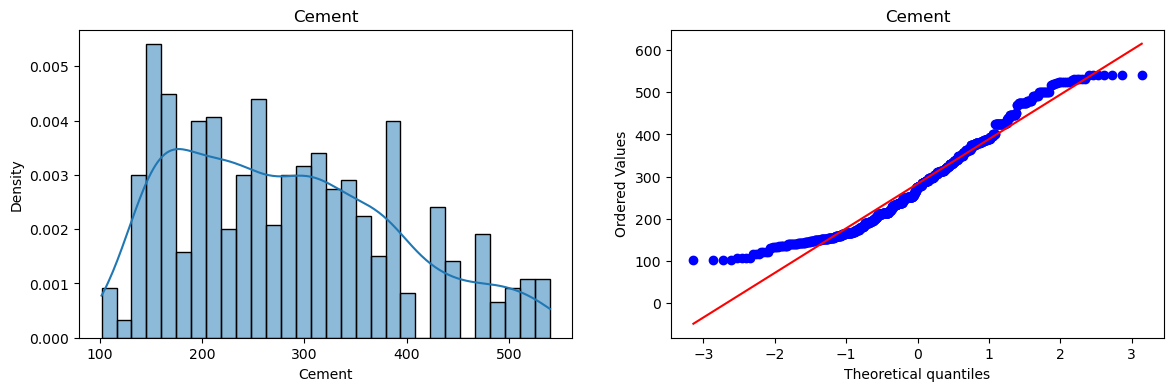

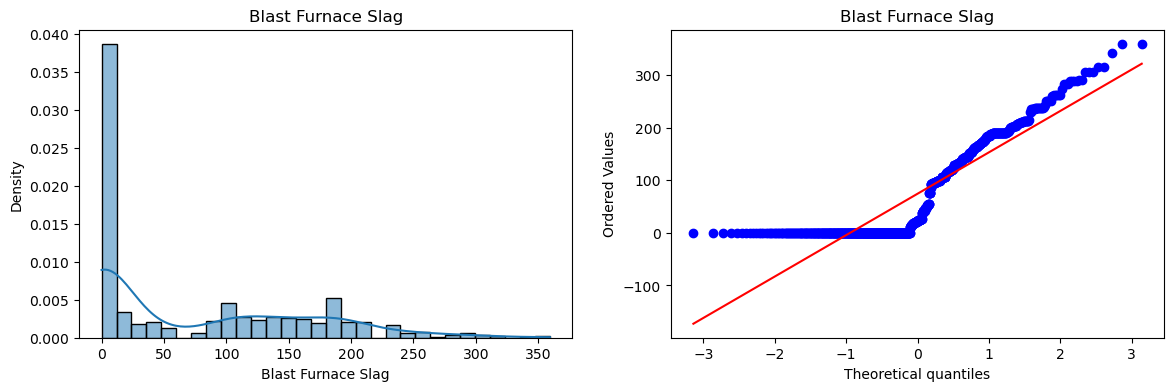

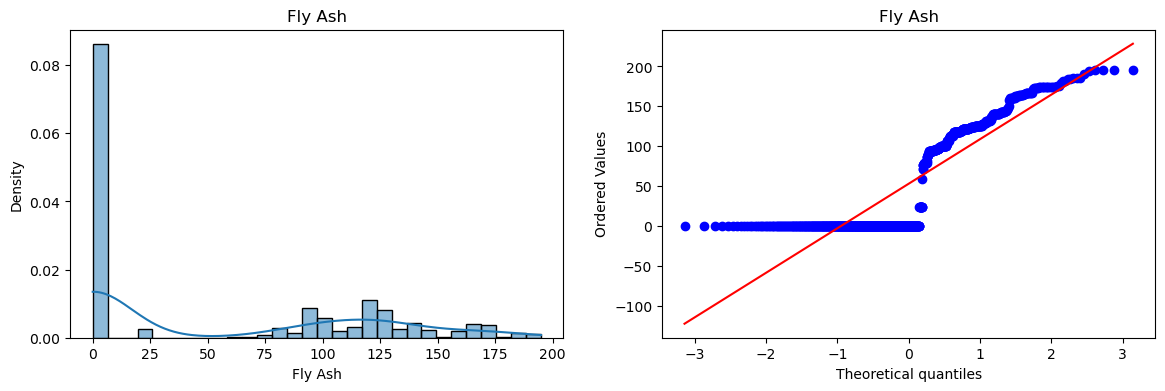

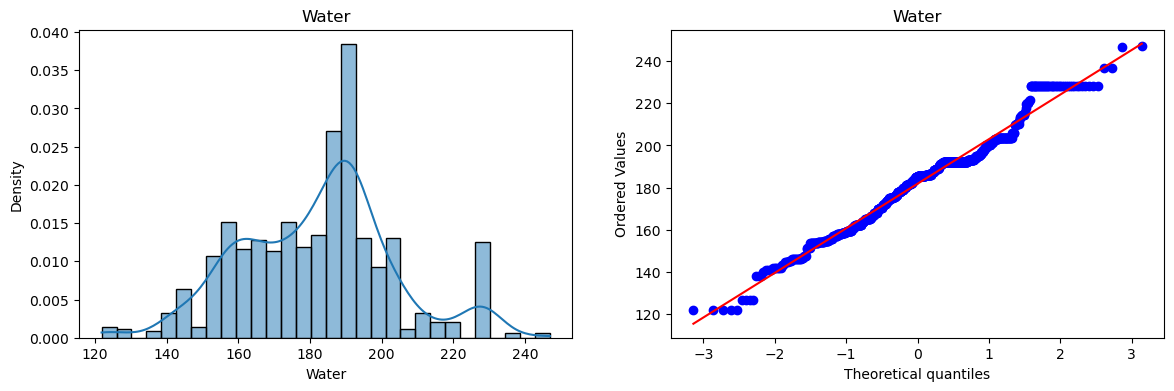

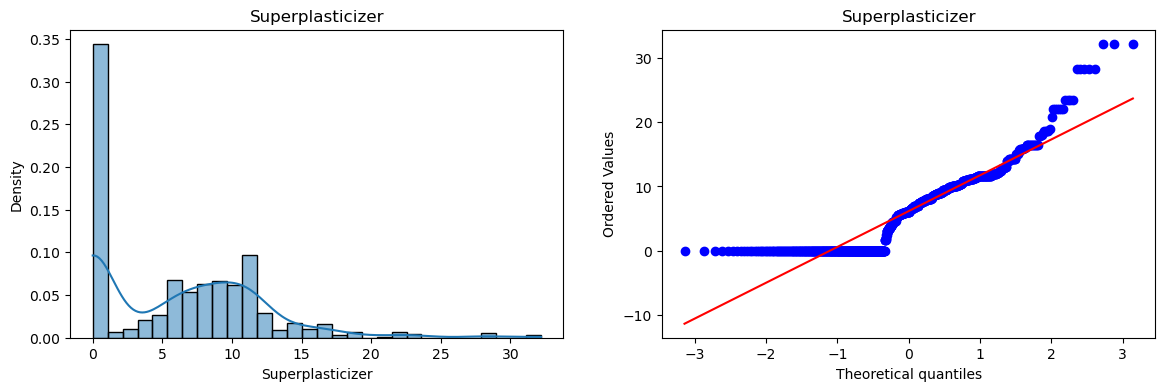

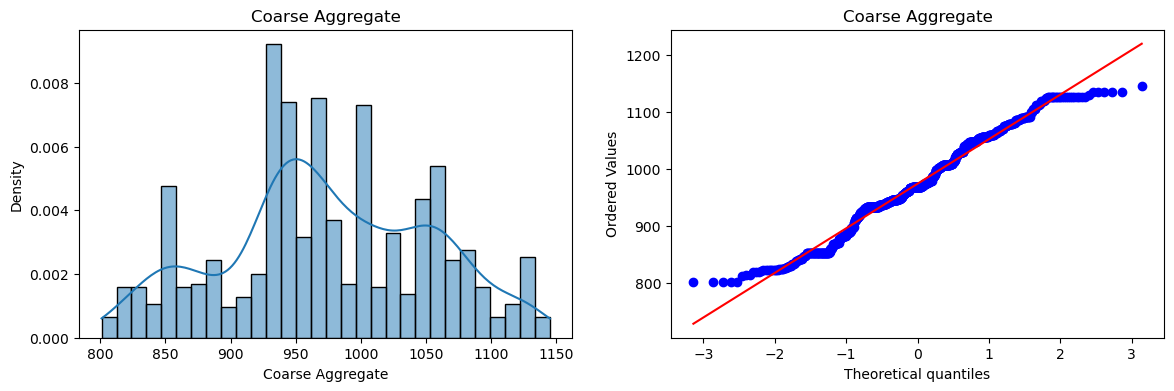

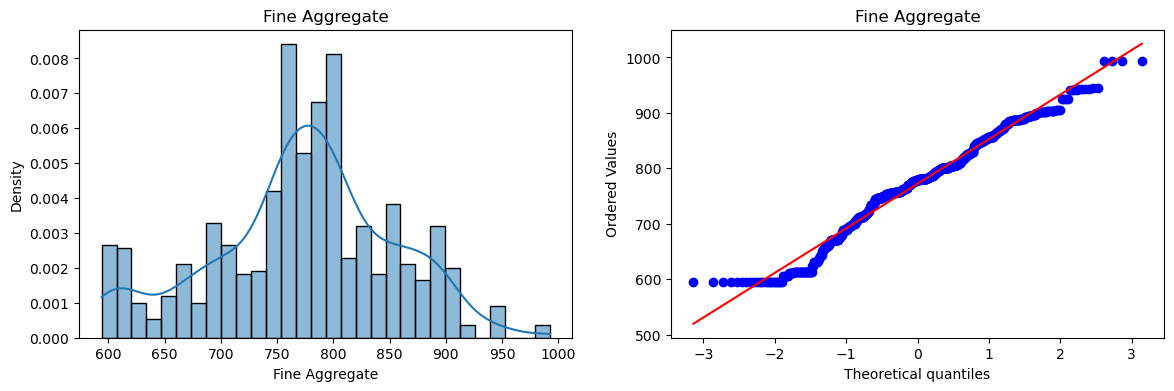

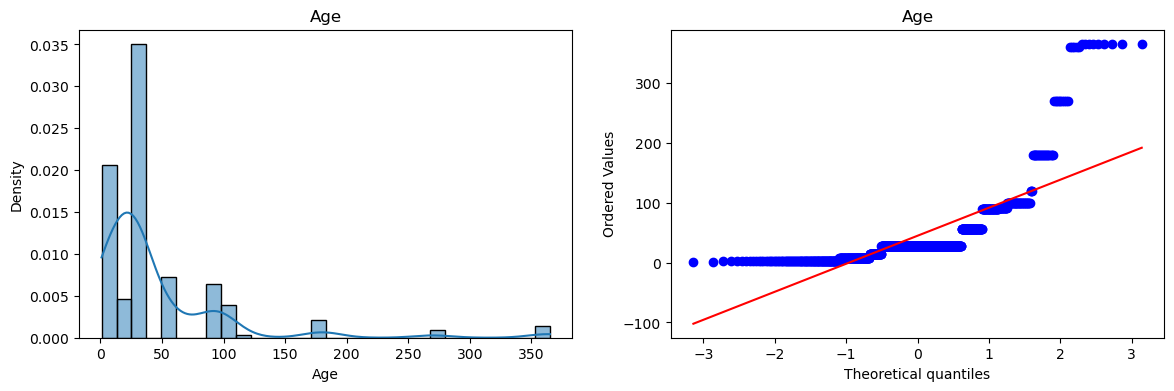

In [11]:
# plotting the distplots without any transformation
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True, stat="density", bins=30)
    plt.title(col)
    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()
    

In [12]:
# applying box coc transform
pt=PowerTransformer(method='box-cox')
x_train_transformed=pt.fit_transform(x_train+0.000001)# beacuse box-cox does not work with 
x_test_transformed=pt.fit_transform(x_test+0.000001)
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})
# for every column we calculated the lambda

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [13]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred2=lr.predict(x_test_transformed)
r2_score(y_test,y_pred2)

0.8055321002541034

In [14]:
pt=PowerTransformer(method='box-cox')
x_transformed=pt.fit_transform(x+0.000001)
lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

np.float64(0.666295032717904)

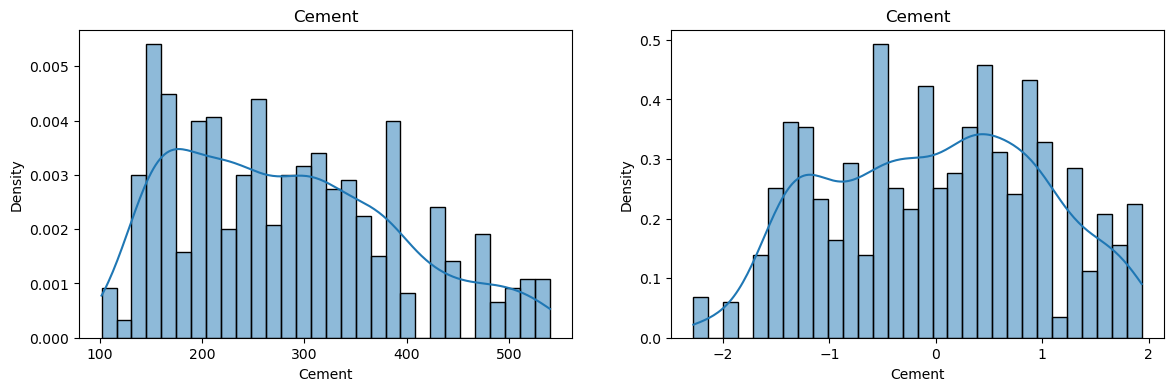

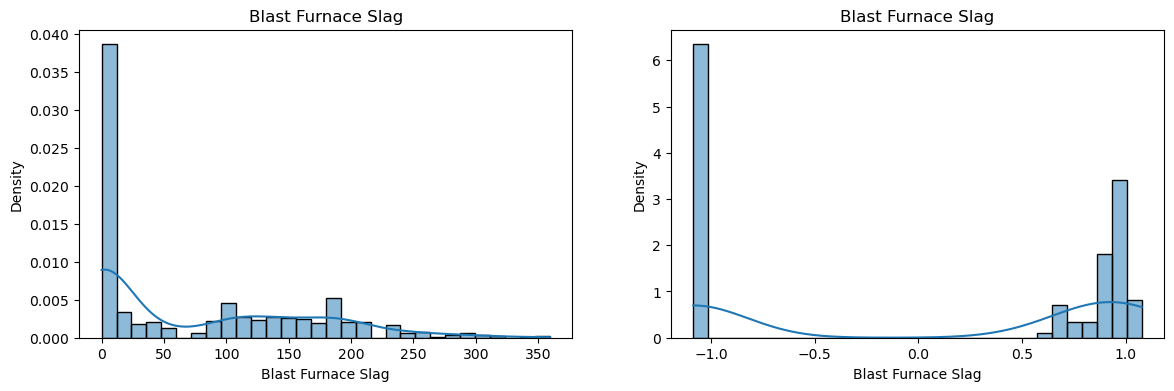

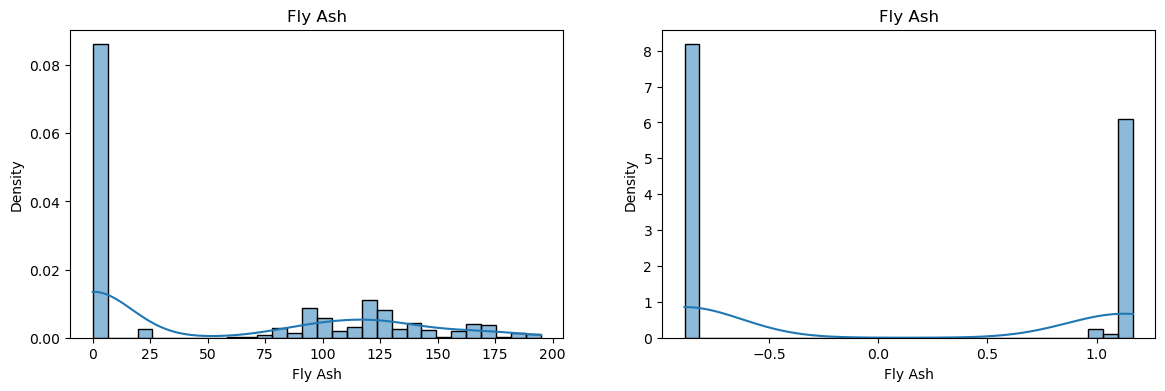

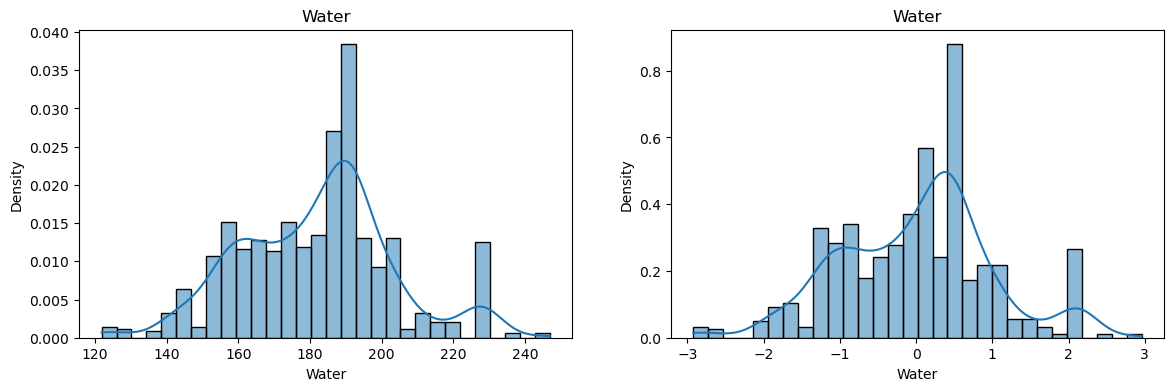

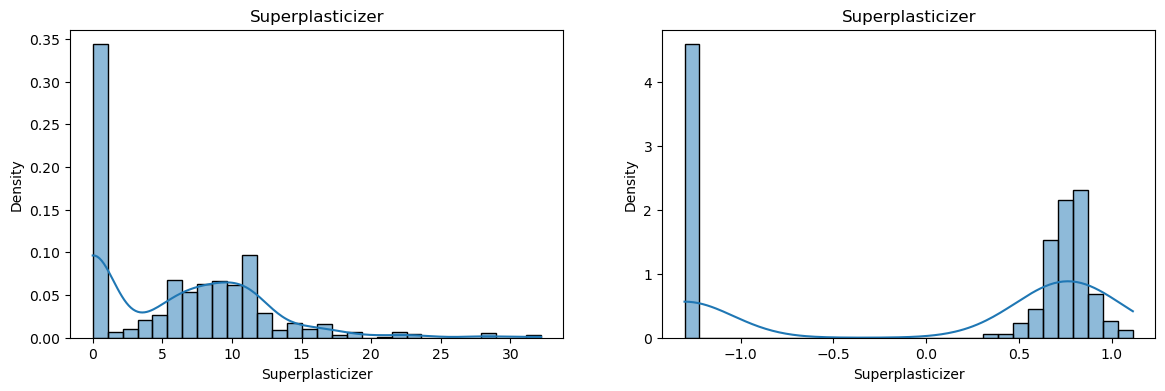

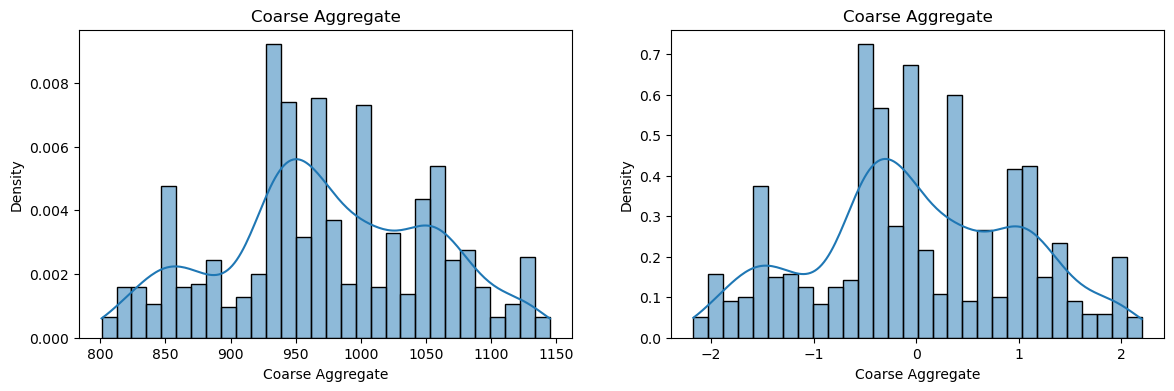

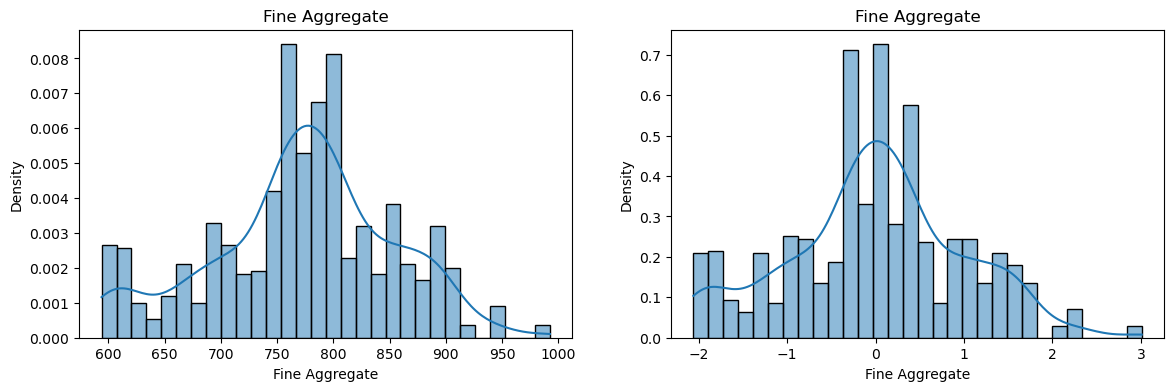

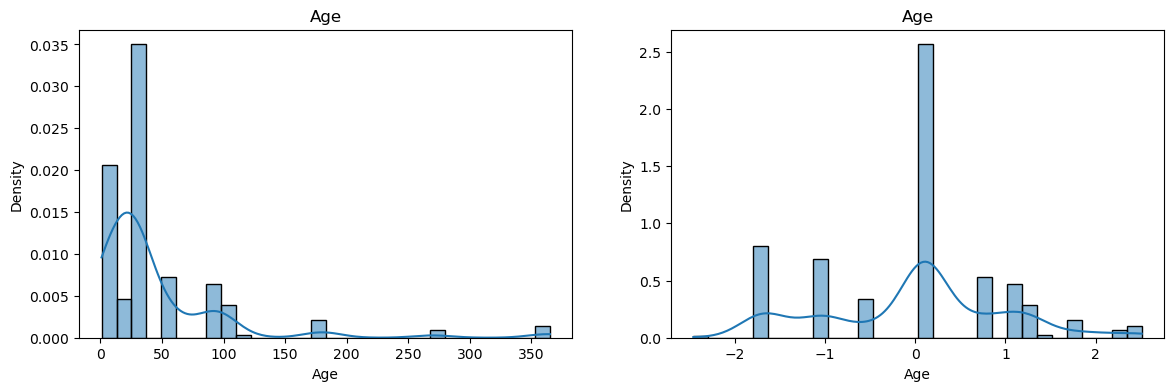

In [15]:
# plotting before and after applying box-cox tranformation
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)
for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True, stat="density", bins=30)
    plt.title(col)
    plt.subplot(122)
    sns.histplot(x_train_transformed[col], kde=True, stat="density", bins=30)
    plt.title(col)
    plt.show()

In [16]:
# apply yeo-johnson transform
pt1=PowerTransformer()# by default yeo johnson
x_train_transformed2=pt1.fit_transform(x_train)# beacuse box-cox does not work with 
x_test_transformed2=pt1.fit_transform(x_test)
lr=LinearRegression()
lr.fit(x_train_transformed2,y_train)
y_pred3=lr.predict(x_test_transformed2)
print(r2_score(y_test,y_pred3))
pd.DataFrame({'cols':x_train.columns,'Yeo-Johnson_lambdas':pt1.lambdas_})

0.8153845514638947


,cols,Yeo-Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [17]:
pt=PowerTransformer()
x_transformed2=pt.fit_transform(x)
lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))

np.float64(0.6834625141500865)

In [18]:
x_train_transformed2=pd.DataFrame(x_train_transformed,columns=x_train.columns)

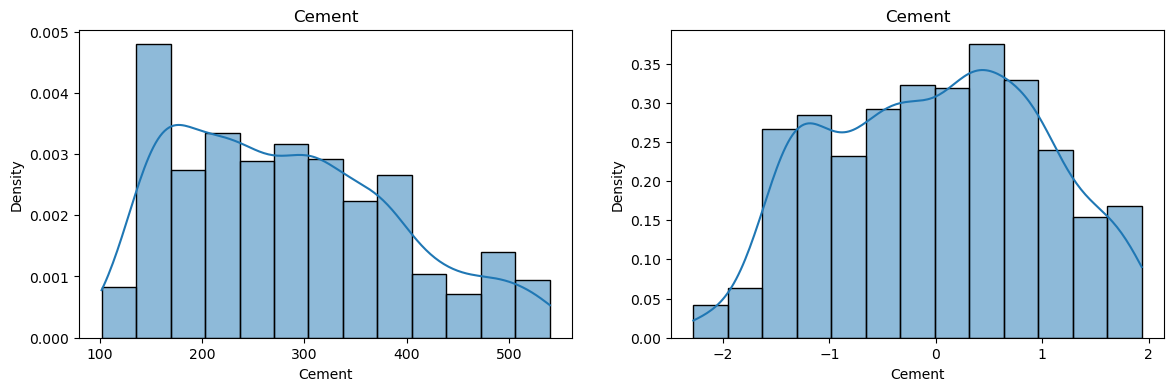

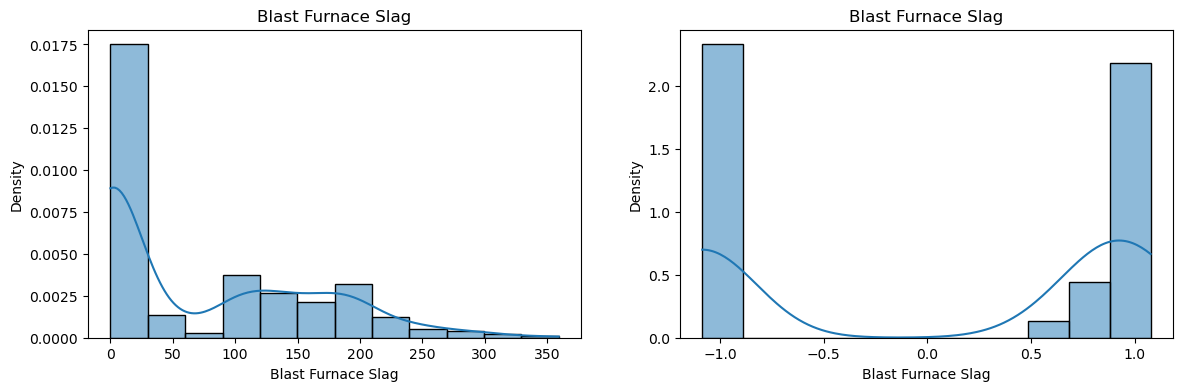

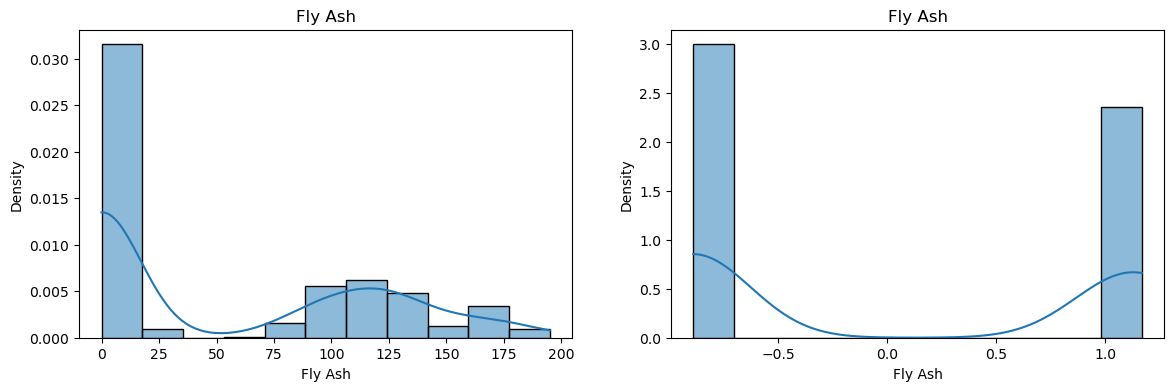

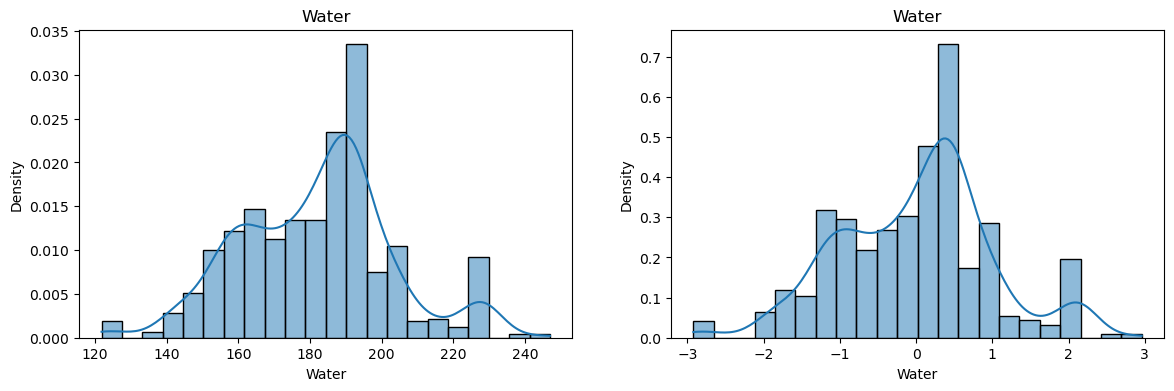

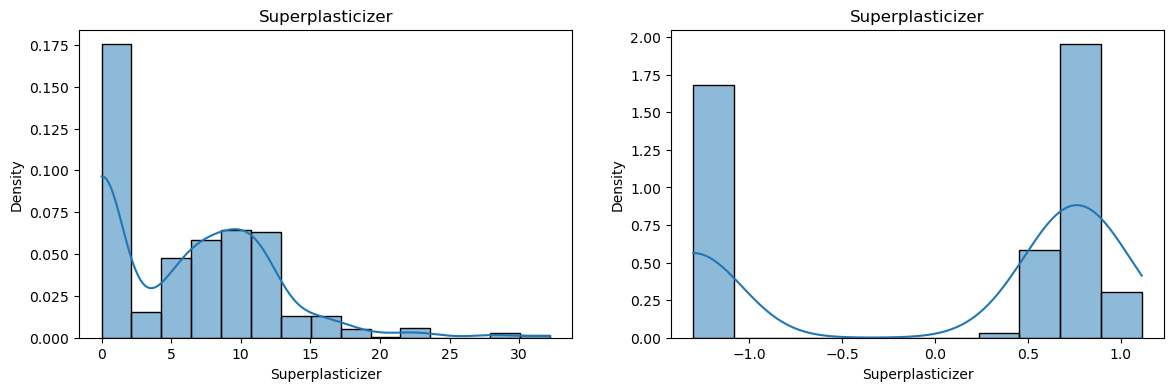

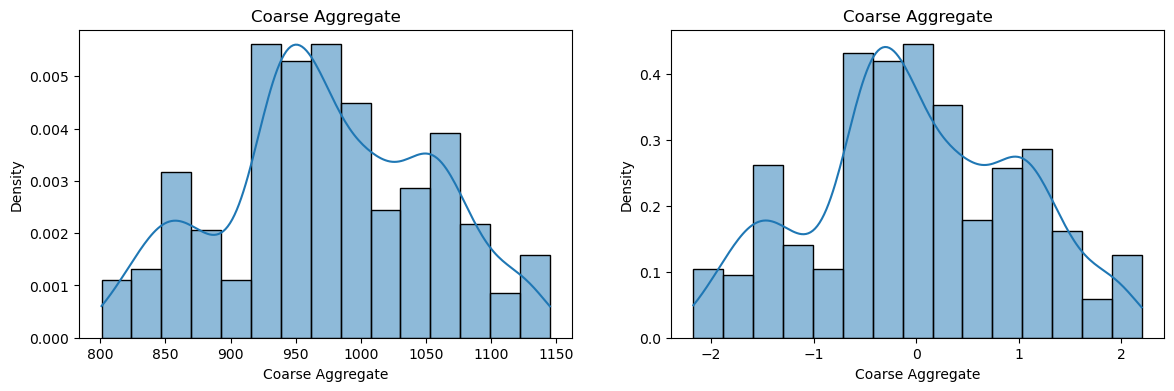

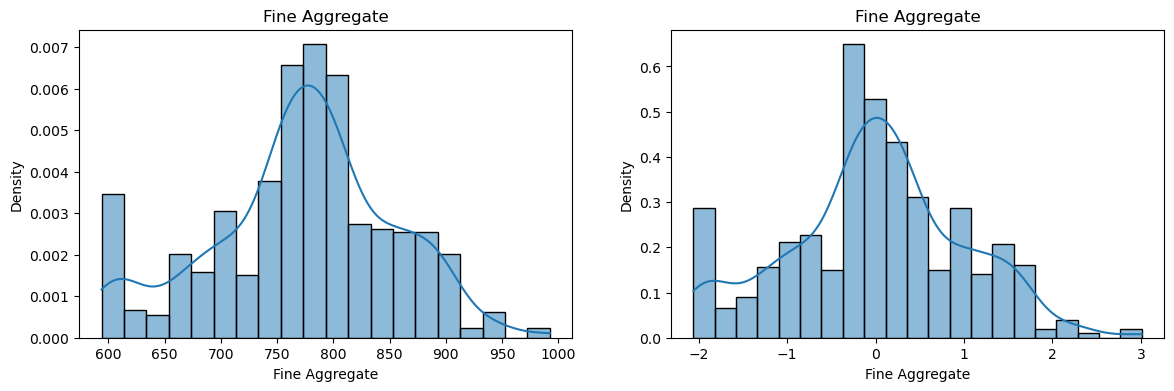

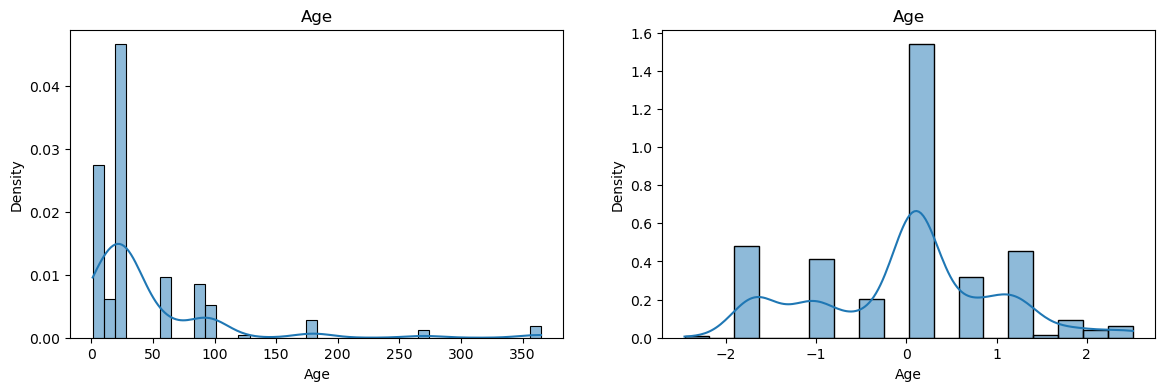

In [19]:
# plotting before and after applying yeo-johnson tranformation
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)
for col in x_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True, stat="density")
    plt.title(col)
    plt.subplot(122)
    sns.histplot(x_train_transformed2[col], kde=True, stat="density")
    plt.title(col)
    plt.show()

In [20]:
# side by side lambas
pd.DataFrame({'cols':x_train.columns,'box-cox-lambdas':pt.lambdas_,'Yeo-Johnson_lambdas':pt1.lambdas_})

,cols,box-cox-lambdas,Yeo-Johnson_lambdas
0,Cement,0.169544,0.213025
1,Blast Furnace Slag,0.016633,0.020476
2,Fly Ash,-0.136480,-0.038218
3,Water,0.808438,0.958936
4,Superplasticizer,0.264160,0.304951
5,Coarse Aggregate,1.129395,1.192751
6,Fine Aggregate,1.830763,1.975085
7,Age,0.001771,-0.062443


<h1>if u r working on algo like linear regression then u need to check the columns whether they are normally distributed or not if not make them normlly distributed by power or function transformer it will deffinetly improve ur model accuracy</h1>